# Questions

1. How are oil prices related to store sales?
2. How much does onpromotion affect things?
3. How much variance is there day to day?
- what if I just predict the exact same amount for that store as yday? what might my rmsle be?
    - same but adj. for basic factors like:
    day of week
    is it a holiday
    onpromotion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
transactions_df = pd.read_csv('data/transactions.csv')
oil_df = pd.read_csv('data/oil.csv')
holidays_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

train_df = train_df.drop(columns='id')
train_df['date'] = pd.to_datetime(train_df['date'])

mask = oil_df.isna().sum(axis=1).astype(bool)
oil_df = oil_df.ffill().bfill()
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Q1: How does Oil Affect?
answer: idk rly

In [3]:
# Combine dfs
oil_combined = pd.merge_asof(left=train_df, right=oil_df, on='date')
oil_combined[oil_combined['date'] == pd.to_datetime('2013-01-05')]

,date,store_nbr,family,sales,onpromotion,dcoilwtico
7128,2013-01-05,1,AUTOMOTIVE,5.000,0,93.12
7129,2013-01-05,1,BABY CARE,0.000,0,93.12
7130,2013-01-05,1,BEAUTY,3.000,0,93.12
7131,2013-01-05,1,BEVERAGES,1160.000,0,93.12
7132,2013-01-05,1,BOOKS,0.000,0,93.12
...,...,...,...,...,...,...
8905,2013-01-05,9,POULTRY,510.919,0,93.12
8906,2013-01-05,9,PREPARED FOODS,84.000,0,93.12
8907,2013-01-05,9,PRODUCE,0.000,0,93.12
8908,2013-01-05,9,SCHOOL AND OFFICE SUPPLIES,0.000,0,93.12


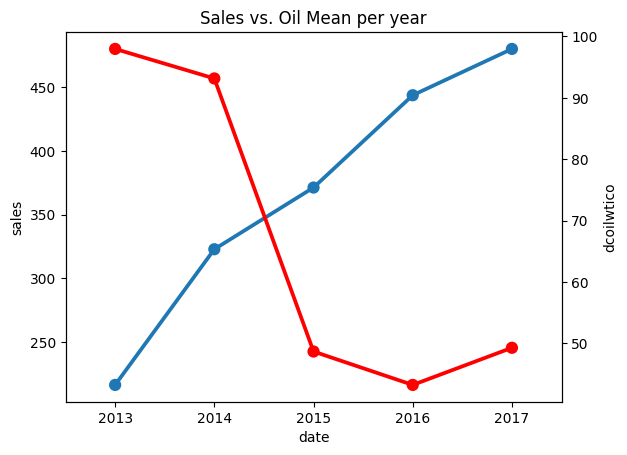

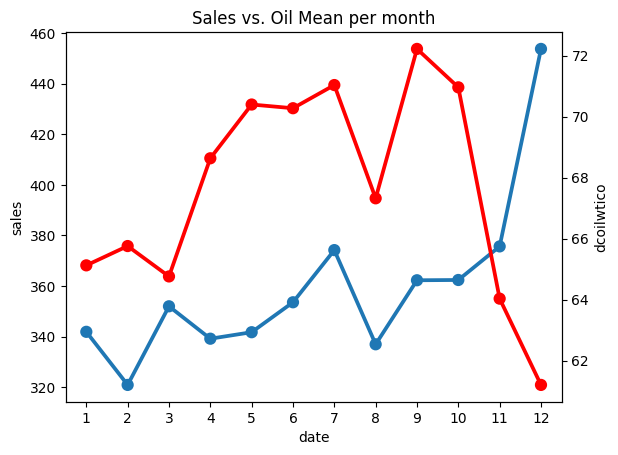

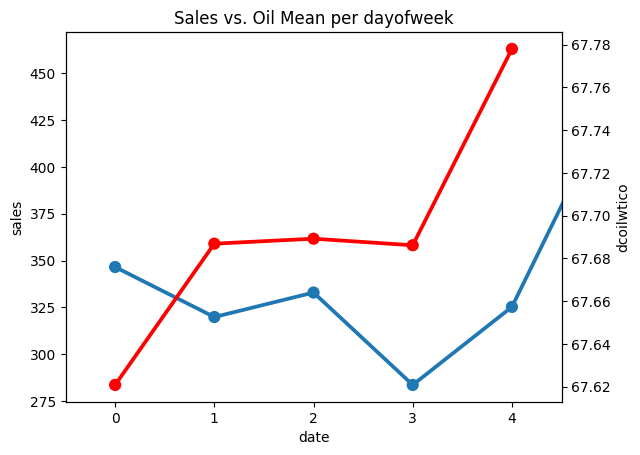

In [4]:
date_attributes = ['year', 'month', 'dayofweek']

for attribute in date_attributes:
    sns.pointplot(data=train_df, x=getattr(train_df['date'].dt, attribute), y='sales', ci=None)
    ax2 = plt.gca().twinx()
    sns.pointplot(data=oil_df, x=getattr(oil_df['date'].dt, attribute), y='dcoilwtico', ci=None, color='red', ax=ax2)

    plt.title(f'Sales vs. Oil Mean per {attribute}')
    plt.show()

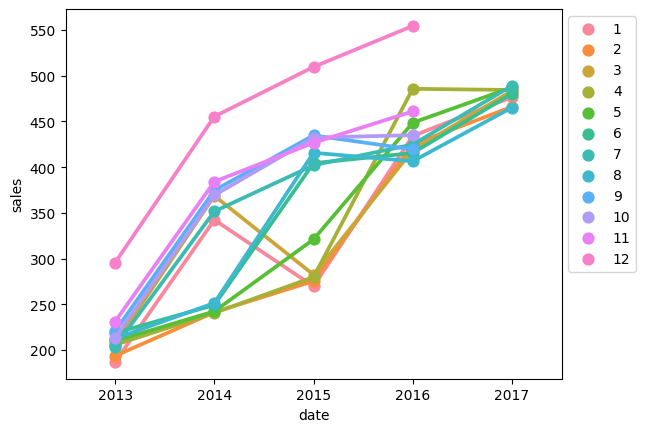

In [5]:
sns.pointplot(data=train_df, x=train_df['date'].dt.year, y='sales', ci=None, hue=train_df['date'].dt.month)
plt.gca().legend(loc='upper left', bbox_to_anchor=(1, 1))

# Q2: How variate is day-to-day sales?
- what if I just predict yesterday's same family and store sales? what about last week?

for a given store/family, look at sales over a year (2017)

<Axes: xlabel='date', ylabel='sales'>

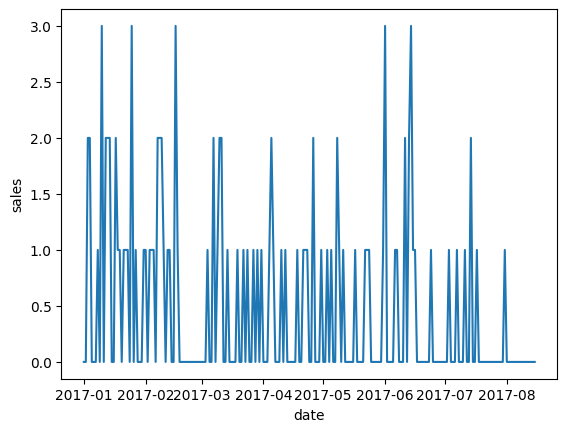

In [6]:
mask = (train_df['store_nbr'] == 1) & (train_df['family'] == 'BOOKS') & (train_df['date'].dt.year == 2017)
filtered = train_df[mask]
sns.lineplot(data=filtered, x='date', y='sales')

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

<Axes: xlabel='date', ylabel='sales'>

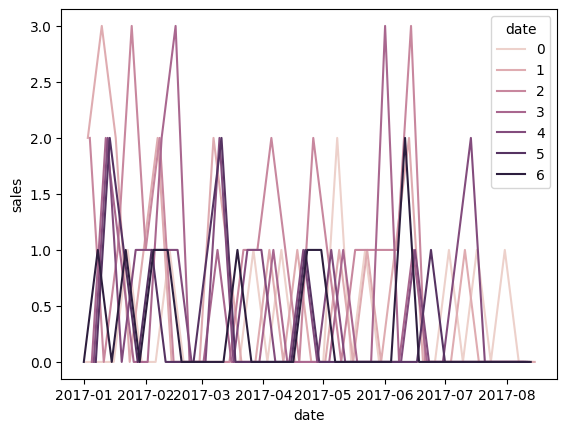

In [7]:
sns.lineplot(x=filtered['date'], y=filtered['sales'], hue=filtered['date'].dt.day_of_week)

<Axes: xlabel='date', ylabel='sales'>

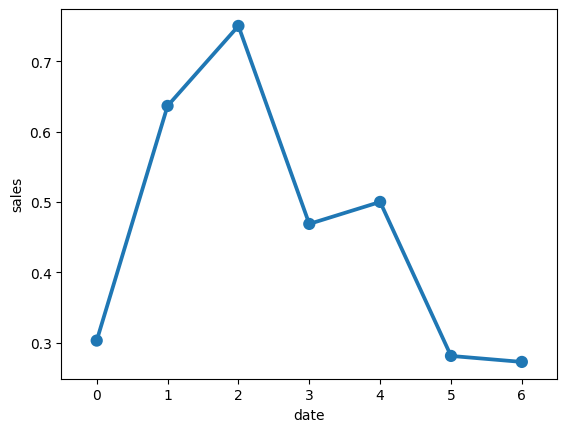

In [8]:
sns.pointplot(data=train_df, x=filtered['date'].dt.day_of_week, y='sales', ci=None)

In [9]:
train_df.groupby(by=['date', 'store_nbr', 'family'])['sales'].sum()

date        store_nbr  family                    
2013-01-01  1          AUTOMOTIVE                      0.000
                       BABY CARE                       0.000
                       BEAUTY                          0.000
                       BEVERAGES                       0.000
                       BOOKS                           0.000
                                                      ...   
2017-08-15  54         POULTRY                        59.619
                       PREPARED FOODS                 94.000
                       PRODUCE                       915.371
                       SCHOOL AND OFFICE SUPPLIES      0.000
                       SEAFOOD                         3.000
Name: sales, Length: 3000888, dtype: float64

In [10]:
shifted = train_df.copy()
shifted['date'] = shifted['date'] + pd.Timedelta('1W')
shifted = shifted.drop(columns='onpromotion')

merged_shift = pd.merge(left=train_df, right=shifted, on=['date', 'store_nbr', 'family'])

In [33]:
merged_shift

,date,store_nbr,family,sales_x,onpromotion,sales_y
0,2013-01-08,1,AUTOMOTIVE,2.000,0,0.000
1,2013-01-08,1,BABY CARE,0.000,0,0.000
2,2013-01-08,1,BEAUTY,3.000,0,0.000
3,2013-01-08,1,BEVERAGES,1029.000,0,0.000
4,2013-01-08,1,BOOKS,0.000,0,0.000
...,...,...,...,...,...,...
2981281,2017-08-15,9,POULTRY,438.133,0,358.132
2981282,2017-08-15,9,PREPARED FOODS,154.553,1,112.954
2981283,2017-08-15,9,PRODUCE,2419.729,148,2299.715
2981284,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,170.000


In [11]:
from sklearn.metrics import root_mean_squared_log_error


root_mean_squared_log_error(merged_shift['sales_x'], merged_shift['sales_y'])

0.6594485476056363

<Axes: xlabel='date'>

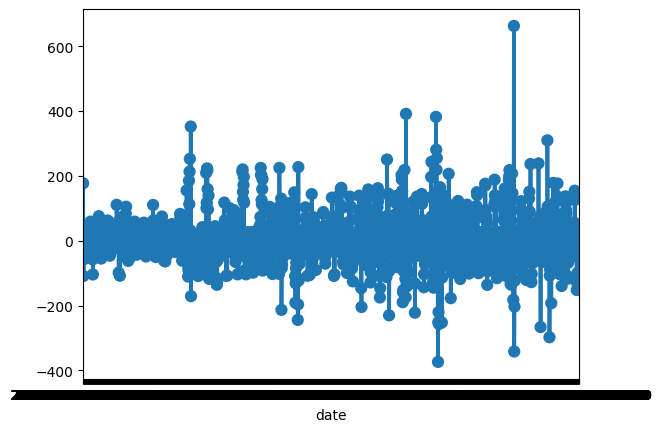

In [12]:
sns.pointplot(data=merged_shift, x='date', y=merged_shift['sales_x'] - merged_shift['sales_y'], ci=None)

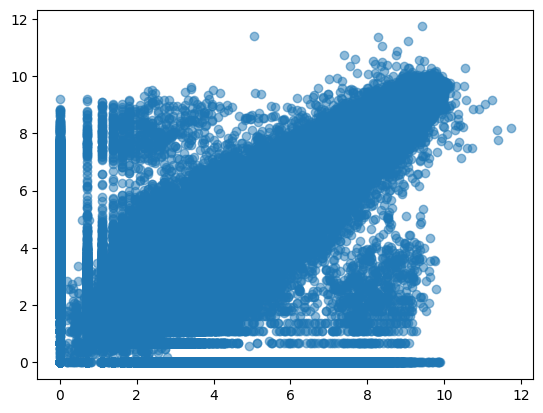

In [13]:
plt.scatter(np.log1p(merged_shift['sales_x']), np.log1p(merged_shift['sales_y']), alpha=0.5)

In [14]:
np.corrcoef(merged_shift['sales_x'], merged_shift['sales_y'])[0][1]**2

0.8815057674857418

In [15]:
import statsmodels.api as sm
model = sm.OLS(merged_shift['sales_x'], sm.add_constant(merged_shift['sales_y'])).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sales_x   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.218e+07
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:11:22   Log-Likelihood:            -2.1941e+07
No. Observations:             2981286   AIC:                         4.388e+07
Df Residuals:                 2981284   BIC:                         4.388e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7587      0.231     98.321      0.000      22.305      23.212
sales_y        0.9421      0.000   4709.401      0.000       0.942       0.943
==============================================================================
Omnibus:                  5218399.678   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   13245779684464.338
Skew:                          10.163   Prob(JB):                         0.00
Kurtosis:                   10329.228   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Week Multipliers Effectiveness


In [ ]:
# Why is 1W ago so good? --> includes day of week influences
    # but, misses out on short term demand trends
    # also has high variance (ex. guessing 3 for books just b/c last week was 3)

# Quick improvement
    # use day of week influence (multiplier for how this day of week compares to others over past month)
    # use recent influence (last 1 week avg.)

In [59]:
prev_week_rolling = train_df.groupby(by=['store_nbr', 'family']).rolling('7D', on='date', closed='left')['sales'].mean().reset_index()
prev_week_rolling = prev_week_rolling.dropna(axis=0)
prev_week_rolling

,store_nbr,family,date,sales
1,1,AUTOMOTIVE,2013-01-02,0.000000
2,1,AUTOMOTIVE,2013-01-03,1.000000
3,1,AUTOMOTIVE,2013-01-04,1.666667
4,1,AUTOMOTIVE,2013-01-05,2.000000
5,1,AUTOMOTIVE,2013-01-06,2.600000
...,...,...,...,...
3000883,54,SEAFOOD,2017-08-11,3.000000
3000884,54,SEAFOOD,2017-08-12,3.000000
3000885,54,SEAFOOD,2017-08-13,2.714286
3000886,54,SEAFOOD,2017-08-14,3.000000


In [57]:
# check if the rolling makes sense
mask = (train_df['store_nbr'] == 1) & (train_df['family'] == 'AUTOMOTIVE')
train_df[mask].head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,2013-01-05,1,AUTOMOTIVE,5.0,0


In [60]:
merged_rolling = pd.merge(train_df, prev_week_rolling, how='inner', on=['store_nbr', 'family', 'date'])
merged_rolling

,date,store_nbr,family,sales_x,onpromotion,sales_y
0,2013-01-02,1,AUTOMOTIVE,2.000,0,0.000000
1,2013-01-02,1,BABY CARE,0.000,0,0.000000
2,2013-01-02,1,BEAUTY,2.000,0,0.000000
3,2013-01-02,1,BEVERAGES,1091.000,0,0.000000
4,2013-01-02,1,BOOKS,0.000,0,0.000000
...,...,...,...,...,...,...
2999101,2017-08-15,9,POULTRY,438.133,0,369.654711
2999102,2017-08-15,9,PREPARED FOODS,154.553,1,115.663141
2999103,2017-08-15,9,PRODUCE,2419.729,148,1508.710857
2999104,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,151.571429


In [61]:
root_mean_squared_log_error(merged_rolling['sales_x'], merged_rolling['sales_y'])

0.5865723525570955

In [66]:
merged_rolling

,date,store_nbr,family,sales_x,onpromotion,sales_y
0,2013-01-02,1,AUTOMOTIVE,2.000,0,0.000000
1,2013-01-02,1,BABY CARE,0.000,0,0.000000
2,2013-01-02,1,BEAUTY,2.000,0,0.000000
3,2013-01-02,1,BEVERAGES,1091.000,0,0.000000
4,2013-01-02,1,BOOKS,0.000,0,0.000000
...,...,...,...,...,...,...
2999101,2017-08-15,9,POULTRY,438.133,0,369.654711
2999102,2017-08-15,9,PREPARED FOODS,154.553,1,115.663141
2999103,2017-08-15,9,PRODUCE,2419.729,148,1508.710857
2999104,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,151.571429


In [68]:
# what if we delete holidays
non_holidays = merged_rolling[~merged_rolling['date'].isin(pd.to_datetime(holidays_df['date']))]
non_holidays

,date,store_nbr,family,sales_x,onpromotion,sales_y
0,2013-01-02,1,AUTOMOTIVE,2.000,0,0.000000
1,2013-01-02,1,BABY CARE,0.000,0,0.000000
2,2013-01-02,1,BEAUTY,2.000,0,0.000000
3,2013-01-02,1,BEVERAGES,1091.000,0,0.000000
4,2013-01-02,1,BOOKS,0.000,0,0.000000
...,...,...,...,...,...,...
2997319,2017-08-14,9,POULTRY,283.429,0,394.741994
2997320,2017-08-14,9,PREPARED FOODS,114.120,0,116.488856
2997321,2017-08-14,9,PRODUCE,1348.425,7,1555.377429
2997322,2017-08-14,9,SCHOOL AND OFFICE SUPPLIES,182.000,11,146.428571


In [77]:
root_mean_squared_log_error(non_holidays['sales_x'], non_holidays['sales_y']*1)

0.5465797625933095